In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.contrib.eager as tfe
import matplotlib.pyplot as plt

%matplotlib inline

tfe.enable_eager_execution(device_policy = tfe.DEVICE_PLACEMENT_SILENT)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from model import GAN

In [3]:
device = 'gpu:0' if tfe.num_gpus() > 0 else 'cpu:0'

In [4]:
noise_dim = 100
output_dim = 28 * 28

In [5]:
gan = GAN(noise_dim=noise_dim, output_dim=output_dim, device_name=device, learning_rate=0.0001)

In [6]:
# if you already have pretrained model
# gan.load(global_step="latest")

In [7]:
from tensorflow.python.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
ds_train = tf.data.Dataset.from_tensor_slices((x_train,))


In [8]:
def origtest():
#     testset = x_test[:10,:,:]      
#     img_orig = testset.reshape(-1,28,28)
#     img_orig = np.concatenate(img_orig, axis=1)
       
#     input_test = testset.astype('float32')/255.
#     input_test = input_test.reshape(-1, 28*28)
#     input_test = tf.convert_to_tensor(input_test)
    
#     z_mu, z_logsigma  = vae.encoding(input_test)
#     z = vae.sampling_z(z_mu, z_logsigma)
    Z = tf.random_normal((10, noise_dim))
    img_test = gan.generator(Z)
    img_test = tf.nn.sigmoid(img_test)
    img_test = img_test.numpy().reshape(-1,28,28)
    img_test = np.concatenate(img_test, axis=1)
            
#     plt.imshow(img_orig)
#     plt.show()
    plt.imshow(img_test)
    plt.show()

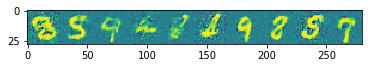

In [24]:
origtest()

In [10]:
# # if you want to train
# for i in range(20):
#     gan.fit(ds_train, saving=True, epochs=2, gen_step=0, dis_step=1, batch_size=256, verbose=1)
#     origtest()

[EPOCH 1 / STEP 1]
TRAIN loss   : 394.0887
GEN   loss   : 317.3196
DIS   loss   : 76.7691
[EPOCH 2 / STEP 2]
TRAIN loss   : 617.5389
GEN   loss   : 572.4285
DIS   loss   : 45.1104
[EPOCH 3 / STEP 3]
TRAIN loss   : 662.2697
GEN   loss   : 622.2124
DIS   loss   : 40.0573
[EPOCH 4 / STEP 4]
TRAIN loss   : 684.1144
GEN   loss   : 650.6026
DIS   loss   : 33.5119
[EPOCH 5 / STEP 5]
TRAIN loss   : 614.6470
GEN   loss   : 586.4590
DIS   loss   : 28.1880
[EPOCH 6 / STEP 6]
TRAIN loss   : 654.1620
GEN   loss   : 633.1058
DIS   loss   : 21.0562
[EPOCH 7 / STEP 7]
TRAIN loss   : 857.3421
GEN   loss   : 844.5203
DIS   loss   : 12.8219
[EPOCH 8 / STEP 8]
TRAIN loss   : 1161.8844
GEN   loss   : 1152.4177
DIS   loss   : 9.4667
[EPOCH 9 / STEP 9]
TRAIN loss   : 1358.2571
GEN   loss   : 1351.1431
DIS   loss   : 7.1140
[EPOCH 10 / STEP 10]
TRAIN loss   : 1690.5232
GEN   loss   : 1684.6913
DIS   loss   : 5.8319


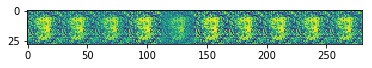

[EPOCH 1 / STEP 11]
TRAIN loss   : 1462.3429
GEN   loss   : 1457.4944
DIS   loss   : 4.8485
[EPOCH 2 / STEP 12]
TRAIN loss   : 1333.5602
GEN   loss   : 1329.6138
DIS   loss   : 3.9464
[EPOCH 3 / STEP 13]
TRAIN loss   : 1267.1580
GEN   loss   : 1263.3978
DIS   loss   : 3.7601
[EPOCH 4 / STEP 14]
TRAIN loss   : 1131.3265
GEN   loss   : 1127.6317
DIS   loss   : 3.6948
[EPOCH 5 / STEP 15]
TRAIN loss   : 1191.9321
GEN   loss   : 1189.1361
DIS   loss   : 2.7960
[EPOCH 6 / STEP 16]
TRAIN loss   : 1383.3102
GEN   loss   : 1380.0065
DIS   loss   : 3.3037
[EPOCH 7 / STEP 17]
TRAIN loss   : 1288.2518
GEN   loss   : 1285.7732
DIS   loss   : 2.4786
[EPOCH 8 / STEP 18]
TRAIN loss   : 1284.2491
GEN   loss   : 1280.6138
DIS   loss   : 3.6354
[EPOCH 9 / STEP 19]
TRAIN loss   : 1322.8975
GEN   loss   : 1319.3236
DIS   loss   : 3.5739
[EPOCH 10 / STEP 20]
TRAIN loss   : 1283.7115
GEN   loss   : 1278.9639
DIS   loss   : 4.7477


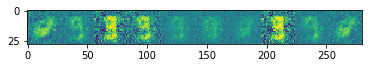

[EPOCH 1 / STEP 21]
TRAIN loss   : 1295.1716
GEN   loss   : 1291.3455
DIS   loss   : 3.8262
[EPOCH 2 / STEP 22]
TRAIN loss   : 1241.6989
GEN   loss   : 1237.7975
DIS   loss   : 3.9014
[EPOCH 3 / STEP 23]
TRAIN loss   : 1373.7386
GEN   loss   : 1369.9453
DIS   loss   : 3.7933
[EPOCH 4 / STEP 24]
TRAIN loss   : 1403.8364
GEN   loss   : 1400.5533
DIS   loss   : 3.2830
[EPOCH 5 / STEP 25]
TRAIN loss   : 1377.8956
GEN   loss   : 1374.8405
DIS   loss   : 3.0552
[EPOCH 6 / STEP 26]
TRAIN loss   : 1368.8629
GEN   loss   : 1365.5659
DIS   loss   : 3.2970
[EPOCH 7 / STEP 27]
TRAIN loss   : 1378.7747
GEN   loss   : 1376.1660
DIS   loss   : 2.6087
[EPOCH 8 / STEP 28]
TRAIN loss   : 1557.2496
GEN   loss   : 1554.5280
DIS   loss   : 2.7217
[EPOCH 9 / STEP 29]
TRAIN loss   : 1542.7327
GEN   loss   : 1540.1805
DIS   loss   : 2.5522
[EPOCH 10 / STEP 30]
TRAIN loss   : 1705.1427
GEN   loss   : 1702.3081
DIS   loss   : 2.8345


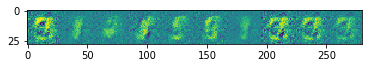

[EPOCH 1 / STEP 31]
TRAIN loss   : 1688.8115
GEN   loss   : 1685.6588
DIS   loss   : 3.1527
[EPOCH 2 / STEP 32]
TRAIN loss   : 1498.4088
GEN   loss   : 1495.2834
DIS   loss   : 3.1253
[EPOCH 3 / STEP 33]
TRAIN loss   : 1492.0481
GEN   loss   : 1488.9724
DIS   loss   : 3.0757
[EPOCH 4 / STEP 34]
TRAIN loss   : 1495.6788
GEN   loss   : 1492.5039
DIS   loss   : 3.1749
[EPOCH 5 / STEP 35]
TRAIN loss   : 1631.8732
GEN   loss   : 1628.7067
DIS   loss   : 3.1664
[EPOCH 6 / STEP 36]
TRAIN loss   : 1530.8391
GEN   loss   : 1527.5789
DIS   loss   : 3.2602
[EPOCH 7 / STEP 37]
TRAIN loss   : 1537.5471
GEN   loss   : 1534.6498
DIS   loss   : 2.8974
[EPOCH 8 / STEP 38]
TRAIN loss   : 1639.2999
GEN   loss   : 1636.1090
DIS   loss   : 3.1909
[EPOCH 9 / STEP 39]
TRAIN loss   : 1833.0200
GEN   loss   : 1829.4374
DIS   loss   : 3.5826
[EPOCH 10 / STEP 40]
TRAIN loss   : 1695.4706
GEN   loss   : 1691.7721
DIS   loss   : 3.6985


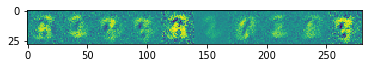

[EPOCH 1 / STEP 41]
TRAIN loss   : 1667.7574
GEN   loss   : 1664.4890
DIS   loss   : 3.2684
[EPOCH 2 / STEP 42]
TRAIN loss   : 1637.6206
GEN   loss   : 1634.4644
DIS   loss   : 3.1562
[EPOCH 3 / STEP 43]
TRAIN loss   : 1568.4698
GEN   loss   : 1564.8209
DIS   loss   : 3.6490
[EPOCH 4 / STEP 44]
TRAIN loss   : 1626.4463
GEN   loss   : 1622.6372
DIS   loss   : 3.8090
[EPOCH 5 / STEP 45]
TRAIN loss   : 1715.6895
GEN   loss   : 1710.8405
DIS   loss   : 4.8489
[EPOCH 6 / STEP 46]
TRAIN loss   : 1635.0525
GEN   loss   : 1630.9847
DIS   loss   : 4.0677
[EPOCH 7 / STEP 47]
TRAIN loss   : 1685.8444
GEN   loss   : 1682.0022
DIS   loss   : 3.8422
[EPOCH 8 / STEP 48]
TRAIN loss   : 1613.3110
GEN   loss   : 1609.2737
DIS   loss   : 4.0374
[EPOCH 9 / STEP 49]
TRAIN loss   : 1580.2660
GEN   loss   : 1576.0029
DIS   loss   : 4.2630
[EPOCH 10 / STEP 50]
TRAIN loss   : 1631.8573
GEN   loss   : 1628.1743
DIS   loss   : 3.6829


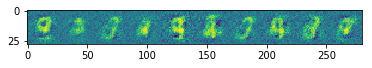

[EPOCH 1 / STEP 51]
TRAIN loss   : 1723.9375
GEN   loss   : 1719.6833
DIS   loss   : 4.2541
[EPOCH 2 / STEP 52]
TRAIN loss   : 1693.1101
GEN   loss   : 1688.0366
DIS   loss   : 5.0735
[EPOCH 3 / STEP 53]
TRAIN loss   : 1633.0710
GEN   loss   : 1629.1680
DIS   loss   : 3.9031
[EPOCH 4 / STEP 54]
TRAIN loss   : 1565.7501
GEN   loss   : 1561.7738
DIS   loss   : 3.9764
[EPOCH 5 / STEP 55]
TRAIN loss   : 1728.5746
GEN   loss   : 1724.2506
DIS   loss   : 4.3240
[EPOCH 6 / STEP 56]
TRAIN loss   : 1608.4624
GEN   loss   : 1603.7834
DIS   loss   : 4.6790
[EPOCH 7 / STEP 57]
TRAIN loss   : 1704.6971
GEN   loss   : 1700.1165
DIS   loss   : 4.5806
[EPOCH 8 / STEP 58]
TRAIN loss   : 1613.9651
GEN   loss   : 1609.4227
DIS   loss   : 4.5424
[EPOCH 9 / STEP 59]
TRAIN loss   : 1690.3041
GEN   loss   : 1685.7433
DIS   loss   : 4.5608
[EPOCH 10 / STEP 60]
TRAIN loss   : 1563.5939
GEN   loss   : 1558.5560
DIS   loss   : 5.0379


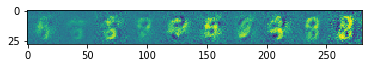

[EPOCH 1 / STEP 61]
TRAIN loss   : 1644.1071
GEN   loss   : 1638.7400
DIS   loss   : 5.3671
[EPOCH 2 / STEP 62]
TRAIN loss   : 1532.4629
GEN   loss   : 1527.9124
DIS   loss   : 4.5506
[EPOCH 3 / STEP 63]
TRAIN loss   : 1625.6924
GEN   loss   : 1621.1083
DIS   loss   : 4.5842
[EPOCH 4 / STEP 64]
TRAIN loss   : 1735.7355
GEN   loss   : 1730.9537
DIS   loss   : 4.7817
[EPOCH 5 / STEP 65]
TRAIN loss   : 1608.3414
GEN   loss   : 1602.1798
DIS   loss   : 6.1617
[EPOCH 6 / STEP 66]
TRAIN loss   : 1678.7898
GEN   loss   : 1672.8915
DIS   loss   : 5.8983
[EPOCH 7 / STEP 67]
TRAIN loss   : 1693.9922
GEN   loss   : 1688.4377
DIS   loss   : 5.5544
[EPOCH 8 / STEP 68]
TRAIN loss   : 1606.2614
GEN   loss   : 1600.3356
DIS   loss   : 5.9257
[EPOCH 9 / STEP 69]
TRAIN loss   : 1673.1965
GEN   loss   : 1666.9263
DIS   loss   : 6.2702
[EPOCH 10 / STEP 70]
TRAIN loss   : 1582.8903
GEN   loss   : 1575.9810
DIS   loss   : 6.9093


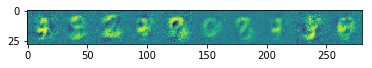

[EPOCH 1 / STEP 71]
TRAIN loss   : 1544.8073
GEN   loss   : 1539.0980
DIS   loss   : 5.7092
[EPOCH 2 / STEP 72]
TRAIN loss   : 1640.4960
GEN   loss   : 1634.1173
DIS   loss   : 6.3787
[EPOCH 3 / STEP 73]
TRAIN loss   : 1626.5203
GEN   loss   : 1620.5568
DIS   loss   : 5.9635
[EPOCH 4 / STEP 74]
TRAIN loss   : 1520.9121
GEN   loss   : 1513.4404
DIS   loss   : 7.4716
[EPOCH 5 / STEP 75]
TRAIN loss   : 1501.6244
GEN   loss   : 1495.1930
DIS   loss   : 6.4314
[EPOCH 6 / STEP 76]
TRAIN loss   : 1552.8333
GEN   loss   : 1545.0240
DIS   loss   : 7.8092
[EPOCH 7 / STEP 77]
TRAIN loss   : 1569.2408
GEN   loss   : 1562.2357
DIS   loss   : 7.0051
[EPOCH 8 / STEP 78]
TRAIN loss   : 1698.3998
GEN   loss   : 1691.1915
DIS   loss   : 7.2082
[EPOCH 9 / STEP 79]
TRAIN loss   : 1663.2379
GEN   loss   : 1655.1978
DIS   loss   : 8.0401
[EPOCH 10 / STEP 80]
TRAIN loss   : 1617.8615
GEN   loss   : 1610.6711
DIS   loss   : 7.1904


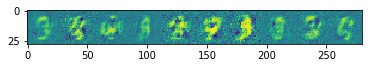

[EPOCH 1 / STEP 81]
TRAIN loss   : 1663.1271
GEN   loss   : 1655.6157
DIS   loss   : 7.5114
[EPOCH 2 / STEP 82]
TRAIN loss   : 1596.1343
GEN   loss   : 1588.2261
DIS   loss   : 7.9081
[EPOCH 3 / STEP 83]
TRAIN loss   : 1723.8346
GEN   loss   : 1716.0969
DIS   loss   : 7.7377
[EPOCH 4 / STEP 84]
TRAIN loss   : 1510.8142
GEN   loss   : 1503.6136
DIS   loss   : 7.2005
[EPOCH 5 / STEP 85]
TRAIN loss   : 1505.0605
GEN   loss   : 1497.5092
DIS   loss   : 7.5514
[EPOCH 6 / STEP 86]
TRAIN loss   : 1692.3207
GEN   loss   : 1682.7518
DIS   loss   : 9.5688
[EPOCH 7 / STEP 87]
TRAIN loss   : 1518.4122
GEN   loss   : 1511.2249
DIS   loss   : 7.1874
[EPOCH 8 / STEP 88]
TRAIN loss   : 1635.8658
GEN   loss   : 1627.4452
DIS   loss   : 8.4206
[EPOCH 9 / STEP 89]
TRAIN loss   : 1577.3689
GEN   loss   : 1569.1863
DIS   loss   : 8.1827
[EPOCH 10 / STEP 90]
TRAIN loss   : 1553.7450
GEN   loss   : 1545.6216
DIS   loss   : 8.1234


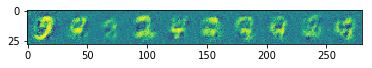

[EPOCH 1 / STEP 91]
TRAIN loss   : 1532.2896
GEN   loss   : 1524.2648
DIS   loss   : 8.0247
[EPOCH 2 / STEP 92]
TRAIN loss   : 1539.0598
GEN   loss   : 1531.1630
DIS   loss   : 7.8969
[EPOCH 3 / STEP 93]
TRAIN loss   : 1580.8029
GEN   loss   : 1571.4702
DIS   loss   : 9.3326
[EPOCH 4 / STEP 94]
TRAIN loss   : 1504.2487
GEN   loss   : 1496.5216
DIS   loss   : 7.7270
[EPOCH 5 / STEP 95]
TRAIN loss   : 1635.7562
GEN   loss   : 1627.6550
DIS   loss   : 8.1012
[EPOCH 6 / STEP 96]
TRAIN loss   : 1457.2651
GEN   loss   : 1448.8795
DIS   loss   : 8.3856
[EPOCH 7 / STEP 97]
TRAIN loss   : 1501.2388
GEN   loss   : 1492.2043
DIS   loss   : 9.0344
[EPOCH 8 / STEP 98]
TRAIN loss   : 1523.9171
GEN   loss   : 1515.5536
DIS   loss   : 8.3635
[EPOCH 9 / STEP 99]
TRAIN loss   : 1578.1025
GEN   loss   : 1569.2023
DIS   loss   : 8.9003
[EPOCH 10 / STEP 100]
TRAIN loss   : 1495.4114
GEN   loss   : 1487.0996
DIS   loss   : 8.3117


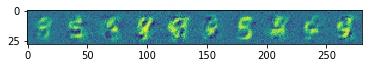

[EPOCH 1 / STEP 101]
TRAIN loss   : 1512.5790
GEN   loss   : 1503.4226
DIS   loss   : 9.1563
[EPOCH 2 / STEP 102]
TRAIN loss   : 1527.1111
GEN   loss   : 1515.9622
DIS   loss   : 11.1489
[EPOCH 3 / STEP 103]
TRAIN loss   : 1599.1340
GEN   loss   : 1589.7019
DIS   loss   : 9.4321
[EPOCH 4 / STEP 104]
TRAIN loss   : 1564.9343
GEN   loss   : 1555.3311
DIS   loss   : 9.6033
[EPOCH 5 / STEP 105]
TRAIN loss   : 1375.5892
GEN   loss   : 1365.6754
DIS   loss   : 9.9138
[EPOCH 6 / STEP 106]
TRAIN loss   : 1563.6482
GEN   loss   : 1553.9583
DIS   loss   : 9.6900
[EPOCH 7 / STEP 107]
TRAIN loss   : 1515.8851
GEN   loss   : 1506.2531
DIS   loss   : 9.6320
[EPOCH 8 / STEP 108]
TRAIN loss   : 1492.3530
GEN   loss   : 1482.6538
DIS   loss   : 9.6992
[EPOCH 9 / STEP 109]
TRAIN loss   : 1508.2446
GEN   loss   : 1498.1945
DIS   loss   : 10.0501
[EPOCH 10 / STEP 110]
TRAIN loss   : 1570.3590
GEN   loss   : 1559.7183
DIS   loss   : 10.6408


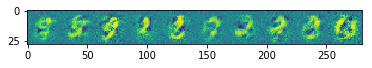

[EPOCH 1 / STEP 111]
TRAIN loss   : 1531.7928
GEN   loss   : 1522.0706
DIS   loss   : 9.7222
[EPOCH 2 / STEP 112]
TRAIN loss   : 1539.7590
GEN   loss   : 1529.9735
DIS   loss   : 9.7855
[EPOCH 3 / STEP 113]
TRAIN loss   : 1564.9835
GEN   loss   : 1553.9266
DIS   loss   : 11.0569
[EPOCH 4 / STEP 114]
TRAIN loss   : 1571.6479
GEN   loss   : 1560.4889
DIS   loss   : 11.1590
[EPOCH 5 / STEP 115]
TRAIN loss   : 1544.7668
GEN   loss   : 1533.9429
DIS   loss   : 10.8240
[EPOCH 6 / STEP 116]
TRAIN loss   : 1622.8414
GEN   loss   : 1612.0856
DIS   loss   : 10.7559
[EPOCH 7 / STEP 117]
TRAIN loss   : 1515.1643
GEN   loss   : 1503.4271
DIS   loss   : 11.7372
[EPOCH 8 / STEP 118]
TRAIN loss   : 1485.7130
GEN   loss   : 1473.3098
DIS   loss   : 12.4033
[EPOCH 9 / STEP 119]
TRAIN loss   : 1445.2507
GEN   loss   : 1434.1694
DIS   loss   : 11.0813
[EPOCH 10 / STEP 120]
TRAIN loss   : 1564.3019
GEN   loss   : 1551.8448
DIS   loss   : 12.4571


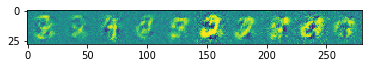

[EPOCH 1 / STEP 121]
TRAIN loss   : 1445.1298
GEN   loss   : 1433.6974
DIS   loss   : 11.4324
[EPOCH 2 / STEP 122]
TRAIN loss   : 1398.8160
GEN   loss   : 1384.8567
DIS   loss   : 13.9593
[EPOCH 3 / STEP 123]
TRAIN loss   : 1450.5406
GEN   loss   : 1437.7152
DIS   loss   : 12.8255
[EPOCH 4 / STEP 124]
TRAIN loss   : 1448.1213
GEN   loss   : 1435.3011
DIS   loss   : 12.8202
[EPOCH 5 / STEP 125]
TRAIN loss   : 1450.9885
GEN   loss   : 1439.6270
DIS   loss   : 11.3616
[EPOCH 6 / STEP 126]
TRAIN loss   : 1373.4147
GEN   loss   : 1360.1118
DIS   loss   : 13.3028
[EPOCH 7 / STEP 127]
TRAIN loss   : 1518.0516
GEN   loss   : 1504.0795
DIS   loss   : 13.9722
[EPOCH 8 / STEP 128]
TRAIN loss   : 1430.3011
GEN   loss   : 1416.8496
DIS   loss   : 13.4515
[EPOCH 9 / STEP 129]
TRAIN loss   : 1390.7836
GEN   loss   : 1376.2227
DIS   loss   : 14.5609
[EPOCH 10 / STEP 130]
TRAIN loss   : 1406.0743
GEN   loss   : 1392.1824
DIS   loss   : 13.8920


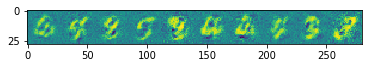

[EPOCH 1 / STEP 131]
TRAIN loss   : 1415.4979
GEN   loss   : 1401.6602
DIS   loss   : 13.8378
[EPOCH 2 / STEP 132]
TRAIN loss   : 1400.3347
GEN   loss   : 1387.0651
DIS   loss   : 13.2697
[EPOCH 3 / STEP 133]
TRAIN loss   : 1399.4220
GEN   loss   : 1384.0818
DIS   loss   : 15.3402
[EPOCH 4 / STEP 134]
TRAIN loss   : 1392.1497
GEN   loss   : 1376.6184
DIS   loss   : 15.5312
[EPOCH 5 / STEP 135]
TRAIN loss   : 1371.1747
GEN   loss   : 1356.9346
DIS   loss   : 14.2401
[EPOCH 6 / STEP 136]
TRAIN loss   : 1333.7433
GEN   loss   : 1318.5446
DIS   loss   : 15.1987
[EPOCH 7 / STEP 137]
TRAIN loss   : 1385.3234
GEN   loss   : 1369.9148
DIS   loss   : 15.4086
[EPOCH 8 / STEP 138]
TRAIN loss   : 1336.9817
GEN   loss   : 1321.7764
DIS   loss   : 15.2053
[EPOCH 9 / STEP 139]
TRAIN loss   : 1301.4779
GEN   loss   : 1286.2130
DIS   loss   : 15.2649
[EPOCH 10 / STEP 140]
TRAIN loss   : 1337.2911
GEN   loss   : 1319.5553
DIS   loss   : 17.7359


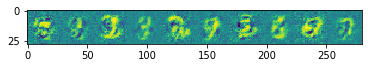

[EPOCH 1 / STEP 141]
TRAIN loss   : 1341.1252
GEN   loss   : 1326.0042
DIS   loss   : 15.1211
[EPOCH 2 / STEP 142]
TRAIN loss   : 1304.9741
GEN   loss   : 1288.5033
DIS   loss   : 16.4708
[EPOCH 3 / STEP 143]
TRAIN loss   : 1268.5870
GEN   loss   : 1252.0676
DIS   loss   : 16.5194
[EPOCH 4 / STEP 144]
TRAIN loss   : 1318.7905
GEN   loss   : 1302.3934
DIS   loss   : 16.3971
[EPOCH 5 / STEP 145]
TRAIN loss   : 1292.7770
GEN   loss   : 1275.9390
DIS   loss   : 16.8380
[EPOCH 6 / STEP 146]
TRAIN loss   : 1313.9403
GEN   loss   : 1297.4877
DIS   loss   : 16.4526
[EPOCH 7 / STEP 147]
TRAIN loss   : 1388.2050
GEN   loss   : 1370.8461
DIS   loss   : 17.3589
[EPOCH 8 / STEP 148]
TRAIN loss   : 1295.6448
GEN   loss   : 1278.6616
DIS   loss   : 16.9832
[EPOCH 9 / STEP 149]
TRAIN loss   : 1318.6921
GEN   loss   : 1301.7225
DIS   loss   : 16.9696
[EPOCH 10 / STEP 150]
TRAIN loss   : 1359.7523
GEN   loss   : 1340.5448
DIS   loss   : 19.2075


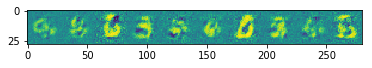

[EPOCH 1 / STEP 151]
TRAIN loss   : 1242.3585
GEN   loss   : 1225.9824
DIS   loss   : 16.3761
[EPOCH 2 / STEP 152]
TRAIN loss   : 1328.9423
GEN   loss   : 1310.8170
DIS   loss   : 18.1253
[EPOCH 3 / STEP 153]
TRAIN loss   : 1272.8215
GEN   loss   : 1254.6467
DIS   loss   : 18.1749
[EPOCH 4 / STEP 154]
TRAIN loss   : 1278.2996
GEN   loss   : 1259.1791
DIS   loss   : 19.1205
[EPOCH 5 / STEP 155]
TRAIN loss   : 1209.1924
GEN   loss   : 1189.8890
DIS   loss   : 19.3034
[EPOCH 6 / STEP 156]
TRAIN loss   : 1236.5830
GEN   loss   : 1218.3167
DIS   loss   : 18.2663
[EPOCH 7 / STEP 157]
TRAIN loss   : 1267.1895
GEN   loss   : 1247.5709
DIS   loss   : 19.6185
[EPOCH 8 / STEP 158]
TRAIN loss   : 1229.5560
GEN   loss   : 1211.6688
DIS   loss   : 17.8872
[EPOCH 9 / STEP 159]
TRAIN loss   : 1202.8395
GEN   loss   : 1182.4830
DIS   loss   : 20.3564
[EPOCH 10 / STEP 160]
TRAIN loss   : 1204.6919
GEN   loss   : 1183.8149
DIS   loss   : 20.8770


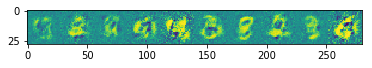

[EPOCH 1 / STEP 161]
TRAIN loss   : 1240.4635
GEN   loss   : 1221.8365
DIS   loss   : 18.6270
[EPOCH 2 / STEP 162]
TRAIN loss   : 1207.7134
GEN   loss   : 1187.1011
DIS   loss   : 20.6123
[EPOCH 3 / STEP 163]
TRAIN loss   : 1279.0825
GEN   loss   : 1258.1023
DIS   loss   : 20.9802
[EPOCH 4 / STEP 164]
TRAIN loss   : 1204.7734
GEN   loss   : 1184.8478
DIS   loss   : 19.9256
[EPOCH 5 / STEP 165]
TRAIN loss   : 1193.7181
GEN   loss   : 1173.0730
DIS   loss   : 20.6451
[EPOCH 6 / STEP 166]
TRAIN loss   : 1144.2867
GEN   loss   : 1123.5861
DIS   loss   : 20.7007
[EPOCH 7 / STEP 167]
TRAIN loss   : 1197.7589
GEN   loss   : 1174.4761
DIS   loss   : 23.2829
[EPOCH 8 / STEP 168]
TRAIN loss   : 1193.0734
GEN   loss   : 1170.2576
DIS   loss   : 22.8158
[EPOCH 9 / STEP 169]
TRAIN loss   : 1137.1591
GEN   loss   : 1113.1810
DIS   loss   : 23.9780
[EPOCH 10 / STEP 170]
TRAIN loss   : 1181.3263
GEN   loss   : 1158.5457
DIS   loss   : 22.7806


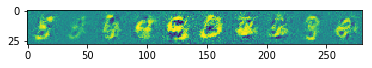

[EPOCH 1 / STEP 171]
TRAIN loss   : 1230.2745
GEN   loss   : 1210.6166
DIS   loss   : 19.6580
[EPOCH 2 / STEP 172]
TRAIN loss   : 1194.3540
GEN   loss   : 1173.8857
DIS   loss   : 20.4683
[EPOCH 3 / STEP 173]
TRAIN loss   : 1198.9773
GEN   loss   : 1176.9874
DIS   loss   : 21.9899
[EPOCH 4 / STEP 174]
TRAIN loss   : 1180.9359
GEN   loss   : 1159.4802
DIS   loss   : 21.4557
[EPOCH 5 / STEP 175]
TRAIN loss   : 1164.2721
GEN   loss   : 1139.1669
DIS   loss   : 25.1052
[EPOCH 6 / STEP 176]
TRAIN loss   : 1134.6809
GEN   loss   : 1109.3987
DIS   loss   : 25.2822
[EPOCH 7 / STEP 177]
TRAIN loss   : 1146.4524
GEN   loss   : 1122.7490
DIS   loss   : 23.7033
[EPOCH 8 / STEP 178]
TRAIN loss   : 1162.2733
GEN   loss   : 1137.3105
DIS   loss   : 24.9628
[EPOCH 9 / STEP 179]
TRAIN loss   : 1176.3336
GEN   loss   : 1151.1163
DIS   loss   : 25.2173
[EPOCH 10 / STEP 180]
TRAIN loss   : 1149.0913
GEN   loss   : 1124.8713
DIS   loss   : 24.2200


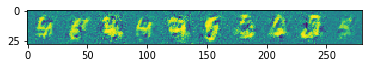

[EPOCH 1 / STEP 181]
TRAIN loss   : 1122.6869
GEN   loss   : 1096.7643
DIS   loss   : 25.9226
[EPOCH 2 / STEP 182]
TRAIN loss   : 1159.6681
GEN   loss   : 1134.1119
DIS   loss   : 25.5562
[EPOCH 3 / STEP 183]
TRAIN loss   : 1107.4984
GEN   loss   : 1080.9636
DIS   loss   : 26.5348
[EPOCH 4 / STEP 184]
TRAIN loss   : 1116.1960
GEN   loss   : 1090.5233
DIS   loss   : 25.6727
[EPOCH 5 / STEP 185]
TRAIN loss   : 1123.8162
GEN   loss   : 1098.8053
DIS   loss   : 25.0109
[EPOCH 6 / STEP 186]
TRAIN loss   : 1135.6108
GEN   loss   : 1108.9304
DIS   loss   : 26.6805
[EPOCH 7 / STEP 187]
TRAIN loss   : 1097.0522
GEN   loss   : 1068.5504
DIS   loss   : 28.5018
[EPOCH 8 / STEP 188]
TRAIN loss   : 1110.8356
GEN   loss   : 1084.1732
DIS   loss   : 26.6624
[EPOCH 9 / STEP 189]
TRAIN loss   : 1109.1721
GEN   loss   : 1083.2538
DIS   loss   : 25.9183
[EPOCH 10 / STEP 190]
TRAIN loss   : 1093.9799
GEN   loss   : 1068.2035
DIS   loss   : 25.7764


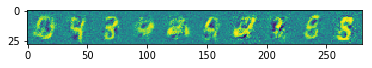

[EPOCH 1 / STEP 191]
TRAIN loss   : 1054.9465
GEN   loss   : 1028.1606
DIS   loss   : 26.7859
[EPOCH 2 / STEP 192]
TRAIN loss   : 1083.4899
GEN   loss   : 1056.5337
DIS   loss   : 26.9561
[EPOCH 3 / STEP 193]
TRAIN loss   : 1065.5281
GEN   loss   : 1037.1531
DIS   loss   : 28.3749
[EPOCH 4 / STEP 194]
TRAIN loss   : 1051.0740
GEN   loss   : 1022.6815
DIS   loss   : 28.3925
[EPOCH 5 / STEP 195]
TRAIN loss   : 1092.1807
GEN   loss   : 1065.0851
DIS   loss   : 27.0956
[EPOCH 6 / STEP 196]
TRAIN loss   : 1050.4753
GEN   loss   : 1021.5955
DIS   loss   : 28.8798
[EPOCH 7 / STEP 197]
TRAIN loss   : 1060.9659
GEN   loss   : 1033.2061
DIS   loss   : 27.7598
[EPOCH 8 / STEP 198]
TRAIN loss   : 1053.5621
GEN   loss   : 1024.2191
DIS   loss   : 29.3431
[EPOCH 9 / STEP 199]
TRAIN loss   : 1069.3462
GEN   loss   : 1040.1462
DIS   loss   : 29.2000
[EPOCH 10 / STEP 200]
TRAIN loss   : 1027.4281
GEN   loss   : 997.5781
DIS   loss   : 29.8500


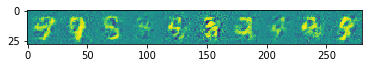

[EPOCH 1 / STEP 201]
TRAIN loss   : 1078.5486
GEN   loss   : 1048.6151
DIS   loss   : 29.9335
[EPOCH 2 / STEP 202]
TRAIN loss   : 1033.9144
GEN   loss   : 1002.7699
DIS   loss   : 31.1445
[EPOCH 3 / STEP 203]
TRAIN loss   : 1017.4131
GEN   loss   : 986.9884
DIS   loss   : 30.4247
[EPOCH 4 / STEP 204]
TRAIN loss   : 1050.2880
GEN   loss   : 1019.7959
DIS   loss   : 30.4921
[EPOCH 5 / STEP 205]
TRAIN loss   : 1043.1320
GEN   loss   : 1014.0129
DIS   loss   : 29.1191
[EPOCH 6 / STEP 206]
TRAIN loss   : 1041.7356
GEN   loss   : 1011.1387
DIS   loss   : 30.5969
[EPOCH 7 / STEP 207]
TRAIN loss   : 1011.2818
GEN   loss   : 981.4648
DIS   loss   : 29.8170
[EPOCH 8 / STEP 208]
TRAIN loss   : 1004.8578
GEN   loss   : 973.0018
DIS   loss   : 31.8560
[EPOCH 9 / STEP 209]
TRAIN loss   : 1003.3853
GEN   loss   : 971.3192
DIS   loss   : 32.0661
[EPOCH 10 / STEP 210]
TRAIN loss   : 1025.9949
GEN   loss   : 994.6010
DIS   loss   : 31.3939


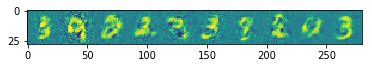

[EPOCH 1 / STEP 211]
TRAIN loss   : 1004.3816
GEN   loss   : 972.9201
DIS   loss   : 31.4615
[EPOCH 2 / STEP 212]
TRAIN loss   : 1022.8697
GEN   loss   : 989.1255
DIS   loss   : 33.7441
[EPOCH 3 / STEP 213]
TRAIN loss   : 1001.9538
GEN   loss   : 968.8655
DIS   loss   : 33.0883
[EPOCH 4 / STEP 214]
TRAIN loss   : 1001.5568
GEN   loss   : 969.7828
DIS   loss   : 31.7741
[EPOCH 5 / STEP 215]
TRAIN loss   : 988.4514
GEN   loss   : 956.1382
DIS   loss   : 32.3131
[EPOCH 6 / STEP 216]
TRAIN loss   : 1037.6315
GEN   loss   : 1004.8416
DIS   loss   : 32.7899
[EPOCH 7 / STEP 217]
TRAIN loss   : 977.9981
GEN   loss   : 942.5361
DIS   loss   : 35.4620
[EPOCH 8 / STEP 218]
TRAIN loss   : 968.3077
GEN   loss   : 933.8666
DIS   loss   : 34.4412
[EPOCH 9 / STEP 219]
TRAIN loss   : 1020.2378
GEN   loss   : 986.4176
DIS   loss   : 33.8202
[EPOCH 10 / STEP 220]
TRAIN loss   : 953.9340
GEN   loss   : 918.3790
DIS   loss   : 35.5550


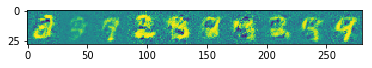

[EPOCH 1 / STEP 221]
TRAIN loss   : 1027.6615
GEN   loss   : 993.6630
DIS   loss   : 33.9985
[EPOCH 2 / STEP 222]
TRAIN loss   : 941.7884
GEN   loss   : 905.1717
DIS   loss   : 36.6167
[EPOCH 3 / STEP 223]
TRAIN loss   : 969.1681
GEN   loss   : 934.3254
DIS   loss   : 34.8427
[EPOCH 4 / STEP 224]
TRAIN loss   : 972.6876
GEN   loss   : 936.4874
DIS   loss   : 36.2003
[EPOCH 5 / STEP 225]
TRAIN loss   : 933.6622
GEN   loss   : 897.7164
DIS   loss   : 35.9458
[EPOCH 6 / STEP 226]
TRAIN loss   : 932.4329
GEN   loss   : 895.9644
DIS   loss   : 36.4685
[EPOCH 7 / STEP 227]
TRAIN loss   : 969.1019
GEN   loss   : 932.6246
DIS   loss   : 36.4773
[EPOCH 8 / STEP 228]
TRAIN loss   : 952.8986
GEN   loss   : 915.8528
DIS   loss   : 37.0457
[EPOCH 9 / STEP 229]
TRAIN loss   : 946.0157
GEN   loss   : 909.8752
DIS   loss   : 36.1405
[EPOCH 10 / STEP 230]
TRAIN loss   : 941.8094
GEN   loss   : 902.7939
DIS   loss   : 39.0155


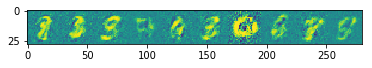

[EPOCH 1 / STEP 231]
TRAIN loss   : 923.9828
GEN   loss   : 886.5773
DIS   loss   : 37.4055
[EPOCH 2 / STEP 232]
TRAIN loss   : 945.2512
GEN   loss   : 909.2067
DIS   loss   : 36.0444
[EPOCH 3 / STEP 233]
TRAIN loss   : 929.3202
GEN   loss   : 890.8536
DIS   loss   : 38.4665
[EPOCH 4 / STEP 234]
TRAIN loss   : 933.9946
GEN   loss   : 894.6844
DIS   loss   : 39.3101
[EPOCH 5 / STEP 235]
TRAIN loss   : 924.2963
GEN   loss   : 884.8512
DIS   loss   : 39.4451
[EPOCH 6 / STEP 236]
TRAIN loss   : 934.2172
GEN   loss   : 896.6207
DIS   loss   : 37.5965
[EPOCH 7 / STEP 237]
TRAIN loss   : 955.0508
GEN   loss   : 916.3599
DIS   loss   : 38.6909
[EPOCH 8 / STEP 238]
TRAIN loss   : 901.0577
GEN   loss   : 860.8820
DIS   loss   : 40.1757
[EPOCH 9 / STEP 239]
TRAIN loss   : 916.9654
GEN   loss   : 875.8871
DIS   loss   : 41.0782
[EPOCH 10 / STEP 240]
TRAIN loss   : 918.7190
GEN   loss   : 878.2040
DIS   loss   : 40.5150


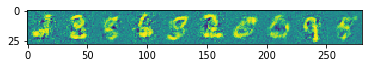

[EPOCH 1 / STEP 241]
TRAIN loss   : 904.8464
GEN   loss   : 866.3104
DIS   loss   : 38.5360
[EPOCH 2 / STEP 242]
TRAIN loss   : 903.3625
GEN   loss   : 862.4969
DIS   loss   : 40.8656
[EPOCH 3 / STEP 243]
TRAIN loss   : 902.3404
GEN   loss   : 861.0453
DIS   loss   : 41.2951
[EPOCH 4 / STEP 244]
TRAIN loss   : 914.9885
GEN   loss   : 873.3820
DIS   loss   : 41.6064
[EPOCH 5 / STEP 245]
TRAIN loss   : 918.8882
GEN   loss   : 878.7559
DIS   loss   : 40.1323
[EPOCH 6 / STEP 246]
TRAIN loss   : 891.4759
GEN   loss   : 851.1749
DIS   loss   : 40.3010
[EPOCH 7 / STEP 247]
TRAIN loss   : 900.1655
GEN   loss   : 858.5134
DIS   loss   : 41.6521
[EPOCH 8 / STEP 248]
TRAIN loss   : 892.3286
GEN   loss   : 851.5569
DIS   loss   : 40.7716
[EPOCH 9 / STEP 249]
TRAIN loss   : 891.0685
GEN   loss   : 850.0314
DIS   loss   : 41.0372
[EPOCH 10 / STEP 250]
TRAIN loss   : 871.5773
GEN   loss   : 828.8979
DIS   loss   : 42.6794


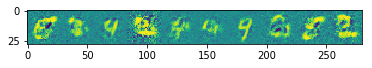

[EPOCH 1 / STEP 251]
TRAIN loss   : 867.6823
GEN   loss   : 825.3310
DIS   loss   : 42.3512
[EPOCH 2 / STEP 252]
TRAIN loss   : 881.8880
GEN   loss   : 839.7644
DIS   loss   : 42.1236
[EPOCH 3 / STEP 253]
TRAIN loss   : 882.4712
GEN   loss   : 840.1910
DIS   loss   : 42.2802
[EPOCH 4 / STEP 254]
TRAIN loss   : 872.1700
GEN   loss   : 829.6375
DIS   loss   : 42.5325
[EPOCH 5 / STEP 255]
TRAIN loss   : 905.6014
GEN   loss   : 864.9493
DIS   loss   : 40.6520
[EPOCH 6 / STEP 256]
TRAIN loss   : 875.9044
GEN   loss   : 832.6940
DIS   loss   : 43.2104
[EPOCH 7 / STEP 257]
TRAIN loss   : 878.6915
GEN   loss   : 837.2138
DIS   loss   : 41.4777
[EPOCH 8 / STEP 258]
TRAIN loss   : 869.5559
GEN   loss   : 826.1235
DIS   loss   : 43.4324
[EPOCH 9 / STEP 259]
TRAIN loss   : 884.9213
GEN   loss   : 841.8734
DIS   loss   : 43.0479
[EPOCH 10 / STEP 260]
TRAIN loss   : 867.1277
GEN   loss   : 822.9655
DIS   loss   : 44.1622


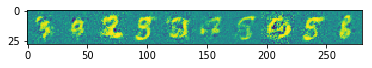

[EPOCH 1 / STEP 261]
TRAIN loss   : 855.4943
GEN   loss   : 812.5115
DIS   loss   : 42.9827
[EPOCH 2 / STEP 262]
TRAIN loss   : 876.9587
GEN   loss   : 833.2888
DIS   loss   : 43.6699
[EPOCH 3 / STEP 263]
TRAIN loss   : 863.8479
GEN   loss   : 819.7238
DIS   loss   : 44.1241
[EPOCH 4 / STEP 264]
TRAIN loss   : 871.9437
GEN   loss   : 828.3696
DIS   loss   : 43.5741
[EPOCH 5 / STEP 265]
TRAIN loss   : 848.0224
GEN   loss   : 804.2444
DIS   loss   : 43.7780
[EPOCH 6 / STEP 266]
TRAIN loss   : 858.2789
GEN   loss   : 815.3436
DIS   loss   : 42.9353
[EPOCH 7 / STEP 267]
TRAIN loss   : 880.4734
GEN   loss   : 835.8699
DIS   loss   : 44.6035
[EPOCH 8 / STEP 268]
TRAIN loss   : 848.0752
GEN   loss   : 804.7033
DIS   loss   : 43.3719
[EPOCH 9 / STEP 269]
TRAIN loss   : 855.3232
GEN   loss   : 810.4545
DIS   loss   : 44.8687
[EPOCH 10 / STEP 270]
TRAIN loss   : 870.6472
GEN   loss   : 826.4355
DIS   loss   : 44.2117


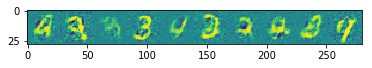

[EPOCH 1 / STEP 271]
TRAIN loss   : 846.3936
GEN   loss   : 799.5281
DIS   loss   : 46.8655
[EPOCH 2 / STEP 272]
TRAIN loss   : 841.4179
GEN   loss   : 796.4257
DIS   loss   : 44.9923
[EPOCH 3 / STEP 273]
TRAIN loss   : 829.6997
GEN   loss   : 783.6006
DIS   loss   : 46.0991
[EPOCH 4 / STEP 274]
TRAIN loss   : 842.6507
GEN   loss   : 797.0240
DIS   loss   : 45.6267
[EPOCH 5 / STEP 275]
TRAIN loss   : 848.2124
GEN   loss   : 803.5021
DIS   loss   : 44.7103
[EPOCH 6 / STEP 276]
TRAIN loss   : 841.7758
GEN   loss   : 796.4521
DIS   loss   : 45.3237
[EPOCH 7 / STEP 277]
TRAIN loss   : 848.6344
GEN   loss   : 804.2252
DIS   loss   : 44.4093
[EPOCH 8 / STEP 278]
TRAIN loss   : 828.9109
GEN   loss   : 781.5532
DIS   loss   : 47.3578
[EPOCH 9 / STEP 279]
TRAIN loss   : 815.4329
GEN   loss   : 770.7037
DIS   loss   : 44.7292
[EPOCH 10 / STEP 280]
TRAIN loss   : 840.7613
GEN   loss   : 795.1931
DIS   loss   : 45.5682


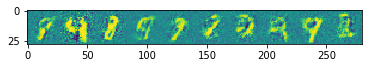

[EPOCH 1 / STEP 281]
TRAIN loss   : 850.2748
GEN   loss   : 805.2245
DIS   loss   : 45.0503
[EPOCH 2 / STEP 282]
TRAIN loss   : 830.5109
GEN   loss   : 785.7191
DIS   loss   : 44.7918
[EPOCH 3 / STEP 283]
TRAIN loss   : 832.3463
GEN   loss   : 786.1196
DIS   loss   : 46.2267
[EPOCH 4 / STEP 284]
TRAIN loss   : 843.7405
GEN   loss   : 798.7773
DIS   loss   : 44.9632
[EPOCH 5 / STEP 285]
TRAIN loss   : 829.0031
GEN   loss   : 782.3034
DIS   loss   : 46.6996
[EPOCH 6 / STEP 286]
TRAIN loss   : 845.0823
GEN   loss   : 800.2474
DIS   loss   : 44.8348
[EPOCH 7 / STEP 287]
TRAIN loss   : 818.6923
GEN   loss   : 772.1996
DIS   loss   : 46.4927
[EPOCH 8 / STEP 288]
TRAIN loss   : 837.4825
GEN   loss   : 792.8925
DIS   loss   : 44.5901
[EPOCH 9 / STEP 289]
TRAIN loss   : 840.0122
GEN   loss   : 793.4333
DIS   loss   : 46.5788
[EPOCH 10 / STEP 290]
TRAIN loss   : 837.2350
GEN   loss   : 791.5184
DIS   loss   : 45.7167


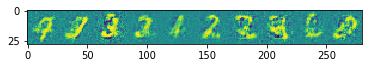

[EPOCH 1 / STEP 291]
TRAIN loss   : 846.6477
GEN   loss   : 801.9181
DIS   loss   : 44.7296
[EPOCH 2 / STEP 292]
TRAIN loss   : 835.5151
GEN   loss   : 789.0623
DIS   loss   : 46.4528
[EPOCH 3 / STEP 293]
TRAIN loss   : 845.0369
GEN   loss   : 798.3002
DIS   loss   : 46.7367
[EPOCH 4 / STEP 294]
TRAIN loss   : 834.7080
GEN   loss   : 787.0549
DIS   loss   : 47.6531
[EPOCH 5 / STEP 295]
TRAIN loss   : 820.0407
GEN   loss   : 773.6633
DIS   loss   : 46.3774
[EPOCH 6 / STEP 296]
TRAIN loss   : 829.4561
GEN   loss   : 783.2977
DIS   loss   : 46.1584
[EPOCH 7 / STEP 297]
TRAIN loss   : 805.9953
GEN   loss   : 758.3716
DIS   loss   : 47.6236
[EPOCH 8 / STEP 298]
TRAIN loss   : 816.8420
GEN   loss   : 769.7906
DIS   loss   : 47.0515
[EPOCH 9 / STEP 299]
TRAIN loss   : 829.1195
GEN   loss   : 780.7218
DIS   loss   : 48.3977
[EPOCH 10 / STEP 300]
TRAIN loss   : 805.0411
GEN   loss   : 757.6545
DIS   loss   : 47.3866


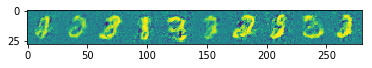

[EPOCH 1 / STEP 301]
TRAIN loss   : 808.9589
GEN   loss   : 761.8127
DIS   loss   : 47.1463
[EPOCH 2 / STEP 302]
TRAIN loss   : 812.8110
GEN   loss   : 765.5574
DIS   loss   : 47.2536
[EPOCH 3 / STEP 303]
TRAIN loss   : 824.9087
GEN   loss   : 777.6951
DIS   loss   : 47.2136
[EPOCH 4 / STEP 304]
TRAIN loss   : 813.4696
GEN   loss   : 765.4393
DIS   loss   : 48.0302
[EPOCH 5 / STEP 305]
TRAIN loss   : 811.5901
GEN   loss   : 762.7736
DIS   loss   : 48.8165
[EPOCH 6 / STEP 306]
TRAIN loss   : 813.8649
GEN   loss   : 767.6981
DIS   loss   : 46.1667
[EPOCH 7 / STEP 307]
TRAIN loss   : 822.4440
GEN   loss   : 775.3306
DIS   loss   : 47.1134
[EPOCH 8 / STEP 308]
TRAIN loss   : 833.7069
GEN   loss   : 787.3497
DIS   loss   : 46.3572
[EPOCH 9 / STEP 309]
TRAIN loss   : 818.8562
GEN   loss   : 771.8981
DIS   loss   : 46.9582
[EPOCH 10 / STEP 310]
TRAIN loss   : 819.4515
GEN   loss   : 773.0825
DIS   loss   : 46.3690


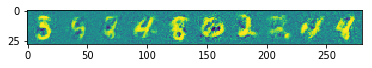

[EPOCH 1 / STEP 311]
TRAIN loss   : 839.2567
GEN   loss   : 795.0383
DIS   loss   : 44.2183
[EPOCH 2 / STEP 312]
TRAIN loss   : 827.4053
GEN   loss   : 780.0356
DIS   loss   : 47.3697
[EPOCH 3 / STEP 313]
TRAIN loss   : 820.2560
GEN   loss   : 772.6982
DIS   loss   : 47.5577
[EPOCH 4 / STEP 314]
TRAIN loss   : 844.9151
GEN   loss   : 799.3020
DIS   loss   : 45.6131
[EPOCH 5 / STEP 315]
TRAIN loss   : 840.3674
GEN   loss   : 795.0121
DIS   loss   : 45.3553
[EPOCH 6 / STEP 316]
TRAIN loss   : 800.9479
GEN   loss   : 752.8624
DIS   loss   : 48.0855
[EPOCH 7 / STEP 317]
TRAIN loss   : 824.1288
GEN   loss   : 778.4969
DIS   loss   : 45.6319
[EPOCH 8 / STEP 318]
TRAIN loss   : 845.1854
GEN   loss   : 800.1901
DIS   loss   : 44.9953
[EPOCH 9 / STEP 319]
TRAIN loss   : 837.2610
GEN   loss   : 791.1981
DIS   loss   : 46.0629
[EPOCH 10 / STEP 320]
TRAIN loss   : 832.8853
GEN   loss   : 787.1564
DIS   loss   : 45.7290


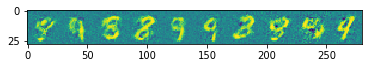

[EPOCH 1 / STEP 321]
TRAIN loss   : 853.7888
GEN   loss   : 810.1981
DIS   loss   : 43.5907
[EPOCH 2 / STEP 322]
TRAIN loss   : 839.6937
GEN   loss   : 793.9266
DIS   loss   : 45.7671
[EPOCH 3 / STEP 323]
TRAIN loss   : 847.1247
GEN   loss   : 801.2976
DIS   loss   : 45.8271
[EPOCH 4 / STEP 324]
TRAIN loss   : 838.3556
GEN   loss   : 792.5955
DIS   loss   : 45.7601
[EPOCH 5 / STEP 325]
TRAIN loss   : 838.6973
GEN   loss   : 792.1528
DIS   loss   : 46.5445
[EPOCH 6 / STEP 326]
TRAIN loss   : 824.2633
GEN   loss   : 777.9997
DIS   loss   : 46.2636
[EPOCH 7 / STEP 327]
TRAIN loss   : 834.4813
GEN   loss   : 789.1349
DIS   loss   : 45.3464
[EPOCH 8 / STEP 328]
TRAIN loss   : 828.0799
GEN   loss   : 778.8472
DIS   loss   : 49.2327
[EPOCH 9 / STEP 329]
TRAIN loss   : 812.2097
GEN   loss   : 764.2968
DIS   loss   : 47.9129
[EPOCH 10 / STEP 330]
TRAIN loss   : 811.0530
GEN   loss   : 763.3387
DIS   loss   : 47.7143


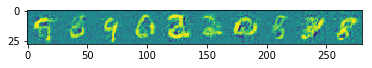

[EPOCH 1 / STEP 331]
TRAIN loss   : 834.9670
GEN   loss   : 789.1464
DIS   loss   : 45.8207
[EPOCH 2 / STEP 332]
TRAIN loss   : 833.8269
GEN   loss   : 786.5291
DIS   loss   : 47.2978
[EPOCH 3 / STEP 333]
TRAIN loss   : 824.5171
GEN   loss   : 777.1995
DIS   loss   : 47.3176
[EPOCH 4 / STEP 334]
TRAIN loss   : 816.4694
GEN   loss   : 769.2136
DIS   loss   : 47.2558
[EPOCH 5 / STEP 335]
TRAIN loss   : 831.3341
GEN   loss   : 784.1464
DIS   loss   : 47.1877
[EPOCH 6 / STEP 336]
TRAIN loss   : 826.8751
GEN   loss   : 779.2303
DIS   loss   : 47.6448
[EPOCH 7 / STEP 337]
TRAIN loss   : 803.1902
GEN   loss   : 753.9437
DIS   loss   : 49.2465
[EPOCH 8 / STEP 338]
TRAIN loss   : 813.6592
GEN   loss   : 766.5256
DIS   loss   : 47.1336
[EPOCH 9 / STEP 339]
TRAIN loss   : 820.1534
GEN   loss   : 771.5699
DIS   loss   : 48.5835
[EPOCH 10 / STEP 340]
TRAIN loss   : 800.5851
GEN   loss   : 751.3214
DIS   loss   : 49.2638


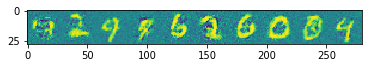

[EPOCH 1 / STEP 341]
TRAIN loss   : 796.6102
GEN   loss   : 747.2761
DIS   loss   : 49.3341
[EPOCH 2 / STEP 342]
TRAIN loss   : 802.0869
GEN   loss   : 752.5633
DIS   loss   : 49.5235
[EPOCH 3 / STEP 343]
TRAIN loss   : 811.5093
GEN   loss   : 762.2152
DIS   loss   : 49.2941
[EPOCH 4 / STEP 344]
TRAIN loss   : 802.2271
GEN   loss   : 753.3804
DIS   loss   : 48.8466
[EPOCH 5 / STEP 345]
TRAIN loss   : 802.7836
GEN   loss   : 754.1928
DIS   loss   : 48.5908
[EPOCH 6 / STEP 346]
TRAIN loss   : 811.1359
GEN   loss   : 761.9944
DIS   loss   : 49.1414
[EPOCH 7 / STEP 347]
TRAIN loss   : 806.4342
GEN   loss   : 756.1765
DIS   loss   : 50.2578
[EPOCH 8 / STEP 348]
TRAIN loss   : 806.1544
GEN   loss   : 756.7865
DIS   loss   : 49.3679
[EPOCH 9 / STEP 349]
TRAIN loss   : 795.2484
GEN   loss   : 743.8387
DIS   loss   : 51.4097
[EPOCH 10 / STEP 350]
TRAIN loss   : 810.6157
GEN   loss   : 760.2690
DIS   loss   : 50.3466


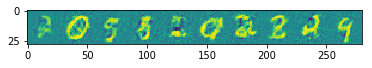

[EPOCH 1 / STEP 351]
TRAIN loss   : 802.2965
GEN   loss   : 752.2315
DIS   loss   : 50.0650
[EPOCH 2 / STEP 352]
TRAIN loss   : 794.3712
GEN   loss   : 744.6905
DIS   loss   : 49.6807
[EPOCH 3 / STEP 353]
TRAIN loss   : 795.6128
GEN   loss   : 745.1816
DIS   loss   : 50.4312
[EPOCH 4 / STEP 354]
TRAIN loss   : 802.5994
GEN   loss   : 753.1426
DIS   loss   : 49.4567
[EPOCH 5 / STEP 355]
TRAIN loss   : 807.3997
GEN   loss   : 758.5070
DIS   loss   : 48.8927
[EPOCH 6 / STEP 356]
TRAIN loss   : 798.4150
GEN   loss   : 747.2149
DIS   loss   : 51.2001
[EPOCH 7 / STEP 357]
TRAIN loss   : 805.5367
GEN   loss   : 755.9462
DIS   loss   : 49.5905
[EPOCH 8 / STEP 358]
TRAIN loss   : 808.6086
GEN   loss   : 759.3448
DIS   loss   : 49.2638
[EPOCH 9 / STEP 359]
TRAIN loss   : 800.3167
GEN   loss   : 750.6463
DIS   loss   : 49.6704
[EPOCH 10 / STEP 360]
TRAIN loss   : 799.5493
GEN   loss   : 748.3309
DIS   loss   : 51.2183


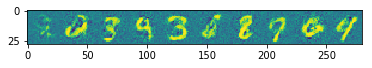

[EPOCH 1 / STEP 361]
TRAIN loss   : 797.6376
GEN   loss   : 747.5402
DIS   loss   : 50.0974
[EPOCH 2 / STEP 362]
TRAIN loss   : 805.7997
GEN   loss   : 756.6741
DIS   loss   : 49.1256
[EPOCH 3 / STEP 363]
TRAIN loss   : 800.8965
GEN   loss   : 750.8232
DIS   loss   : 50.0733
[EPOCH 4 / STEP 364]
TRAIN loss   : 806.2495
GEN   loss   : 756.0765
DIS   loss   : 50.1730
[EPOCH 5 / STEP 365]
TRAIN loss   : 811.7976
GEN   loss   : 758.6693
DIS   loss   : 53.1284
[EPOCH 6 / STEP 366]
TRAIN loss   : 809.9629
GEN   loss   : 759.0390
DIS   loss   : 50.9239
[EPOCH 7 / STEP 367]
TRAIN loss   : 783.3241
GEN   loss   : 730.7401
DIS   loss   : 52.5840
[EPOCH 8 / STEP 368]
TRAIN loss   : 800.6544
GEN   loss   : 749.8438
DIS   loss   : 50.8106
[EPOCH 9 / STEP 369]
TRAIN loss   : 816.7947
GEN   loss   : 767.4493
DIS   loss   : 49.3455
[EPOCH 10 / STEP 370]
TRAIN loss   : 806.5272
GEN   loss   : 755.2881
DIS   loss   : 51.2392


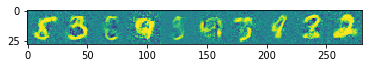

[EPOCH 1 / STEP 371]
TRAIN loss   : 816.2877
GEN   loss   : 766.4724
DIS   loss   : 49.8153
[EPOCH 2 / STEP 372]
TRAIN loss   : 810.8285
GEN   loss   : 761.2614
DIS   loss   : 49.5671
[EPOCH 3 / STEP 373]
TRAIN loss   : 813.4182
GEN   loss   : 763.1266
DIS   loss   : 50.2915
[EPOCH 4 / STEP 374]
TRAIN loss   : 815.8181
GEN   loss   : 765.4412
DIS   loss   : 50.3769
[EPOCH 5 / STEP 375]
TRAIN loss   : 820.3759
GEN   loss   : 771.9832
DIS   loss   : 48.3927
[EPOCH 6 / STEP 376]
TRAIN loss   : 828.4728
GEN   loss   : 780.3339
DIS   loss   : 48.1388
[EPOCH 7 / STEP 377]
TRAIN loss   : 812.4363
GEN   loss   : 761.2020
DIS   loss   : 51.2342
[EPOCH 8 / STEP 378]
TRAIN loss   : 806.4445
GEN   loss   : 756.1197
DIS   loss   : 50.3248
[EPOCH 9 / STEP 379]
TRAIN loss   : 802.4954
GEN   loss   : 752.1690
DIS   loss   : 50.3263
[EPOCH 10 / STEP 380]
TRAIN loss   : 811.4709
GEN   loss   : 760.9849
DIS   loss   : 50.4860


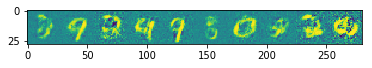

[EPOCH 1 / STEP 381]
TRAIN loss   : 811.3552
GEN   loss   : 761.9597
DIS   loss   : 49.3955
[EPOCH 2 / STEP 382]
TRAIN loss   : 809.1364
GEN   loss   : 758.4516
DIS   loss   : 50.6848
[EPOCH 3 / STEP 383]
TRAIN loss   : 813.8446
GEN   loss   : 763.7928
DIS   loss   : 50.0518
[EPOCH 4 / STEP 384]
TRAIN loss   : 811.6625
GEN   loss   : 759.8309
DIS   loss   : 51.8316
[EPOCH 5 / STEP 385]
TRAIN loss   : 790.2902
GEN   loss   : 737.8389
DIS   loss   : 52.4513
[EPOCH 6 / STEP 386]
TRAIN loss   : 809.0063
GEN   loss   : 756.6183
DIS   loss   : 52.3880
[EPOCH 7 / STEP 387]
TRAIN loss   : 791.2631
GEN   loss   : 738.9203
DIS   loss   : 52.3427
[EPOCH 8 / STEP 388]
TRAIN loss   : 786.7938
GEN   loss   : 736.8353
DIS   loss   : 49.9585
[EPOCH 9 / STEP 389]
TRAIN loss   : 806.8088
GEN   loss   : 756.9722
DIS   loss   : 49.8367
[EPOCH 10 / STEP 390]
TRAIN loss   : 796.6353
GEN   loss   : 745.6205
DIS   loss   : 51.0148


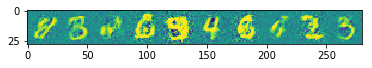

[EPOCH 1 / STEP 391]
TRAIN loss   : 794.7829
GEN   loss   : 744.6497
DIS   loss   : 50.1332
[EPOCH 2 / STEP 392]
TRAIN loss   : 800.0905
GEN   loss   : 749.5500
DIS   loss   : 50.5404
[EPOCH 3 / STEP 393]
TRAIN loss   : 805.3138
GEN   loss   : 754.4078
DIS   loss   : 50.9061
[EPOCH 4 / STEP 394]
TRAIN loss   : 802.5106
GEN   loss   : 751.1086
DIS   loss   : 51.4020
[EPOCH 5 / STEP 395]
TRAIN loss   : 801.1804
GEN   loss   : 750.8881
DIS   loss   : 50.2924
[EPOCH 6 / STEP 396]
TRAIN loss   : 794.6181
GEN   loss   : 740.7976
DIS   loss   : 53.8205
[EPOCH 7 / STEP 397]
TRAIN loss   : 807.8322
GEN   loss   : 757.3724
DIS   loss   : 50.4598
[EPOCH 8 / STEP 398]
TRAIN loss   : 795.7538
GEN   loss   : 743.0717
DIS   loss   : 52.6822
[EPOCH 9 / STEP 399]
TRAIN loss   : 793.8552
GEN   loss   : 742.0400
DIS   loss   : 51.8152
[EPOCH 10 / STEP 400]
TRAIN loss   : 793.3339
GEN   loss   : 740.4366
DIS   loss   : 52.8972


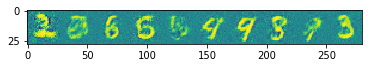

[EPOCH 1 / STEP 401]
TRAIN loss   : 790.7337
GEN   loss   : 738.5386
DIS   loss   : 52.1950
[EPOCH 2 / STEP 402]
TRAIN loss   : 795.7332
GEN   loss   : 742.6078
DIS   loss   : 53.1254
[EPOCH 3 / STEP 403]
TRAIN loss   : 790.6794
GEN   loss   : 738.6697
DIS   loss   : 52.0097
[EPOCH 4 / STEP 404]
TRAIN loss   : 793.8650
GEN   loss   : 742.3040
DIS   loss   : 51.5610
[EPOCH 5 / STEP 405]
TRAIN loss   : 815.8868
GEN   loss   : 763.4435
DIS   loss   : 52.4433
[EPOCH 6 / STEP 406]
TRAIN loss   : 819.9194
GEN   loss   : 768.9326
DIS   loss   : 50.9868
[EPOCH 7 / STEP 407]
TRAIN loss   : 799.5966
GEN   loss   : 746.7023
DIS   loss   : 52.8943
[EPOCH 8 / STEP 408]
TRAIN loss   : 792.7972
GEN   loss   : 739.4504
DIS   loss   : 53.3468
[EPOCH 9 / STEP 409]
TRAIN loss   : 803.8279
GEN   loss   : 751.9392
DIS   loss   : 51.8887
[EPOCH 10 / STEP 410]
TRAIN loss   : 802.8870
GEN   loss   : 751.8112
DIS   loss   : 51.0757


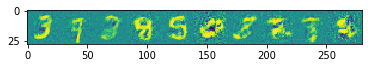

[EPOCH 1 / STEP 411]
TRAIN loss   : 786.6536
GEN   loss   : 733.0217
DIS   loss   : 53.6318
[EPOCH 2 / STEP 412]
TRAIN loss   : 799.1495
GEN   loss   : 748.6431
DIS   loss   : 50.5064
[EPOCH 3 / STEP 413]
TRAIN loss   : 802.2363
GEN   loss   : 749.5072
DIS   loss   : 52.7292
[EPOCH 4 / STEP 414]
TRAIN loss   : 796.9894
GEN   loss   : 744.8618
DIS   loss   : 52.1276
[EPOCH 5 / STEP 415]
TRAIN loss   : 795.4623
GEN   loss   : 742.8486
DIS   loss   : 52.6137
[EPOCH 6 / STEP 416]
TRAIN loss   : 800.4723
GEN   loss   : 748.5045
DIS   loss   : 51.9678
[EPOCH 7 / STEP 417]
TRAIN loss   : 817.5609
GEN   loss   : 766.2850
DIS   loss   : 51.2759
[EPOCH 8 / STEP 418]
TRAIN loss   : 809.2268
GEN   loss   : 757.6036
DIS   loss   : 51.6232
[EPOCH 9 / STEP 419]
TRAIN loss   : 807.1805
GEN   loss   : 756.0793
DIS   loss   : 51.1012
[EPOCH 10 / STEP 420]
TRAIN loss   : 808.2607
GEN   loss   : 757.5980
DIS   loss   : 50.6628


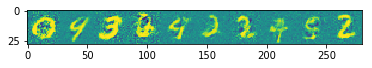

[EPOCH 1 / STEP 421]
TRAIN loss   : 808.6526
GEN   loss   : 756.9975
DIS   loss   : 51.6551
[EPOCH 2 / STEP 422]
TRAIN loss   : 804.9450
GEN   loss   : 754.3965
DIS   loss   : 50.5485
[EPOCH 3 / STEP 423]
TRAIN loss   : 816.0193
GEN   loss   : 767.1761
DIS   loss   : 48.8432
[EPOCH 4 / STEP 424]
TRAIN loss   : 807.6919
GEN   loss   : 755.3570
DIS   loss   : 52.3349
[EPOCH 5 / STEP 425]
TRAIN loss   : 810.5323
GEN   loss   : 758.7464
DIS   loss   : 51.7860
[EPOCH 6 / STEP 426]
TRAIN loss   : 802.2642
GEN   loss   : 750.7102
DIS   loss   : 51.5540
[EPOCH 7 / STEP 427]
TRAIN loss   : 797.3352
GEN   loss   : 744.6848
DIS   loss   : 52.6505
[EPOCH 8 / STEP 428]
TRAIN loss   : 799.9496
GEN   loss   : 747.4570
DIS   loss   : 52.4926
[EPOCH 9 / STEP 429]
TRAIN loss   : 796.1655
GEN   loss   : 743.1412
DIS   loss   : 53.0244
[EPOCH 10 / STEP 430]
TRAIN loss   : 784.8853
GEN   loss   : 731.0210
DIS   loss   : 53.8643


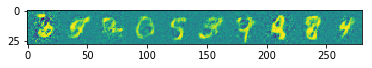

[EPOCH 1 / STEP 431]
TRAIN loss   : 798.9515
GEN   loss   : 747.5023
DIS   loss   : 51.4491
[EPOCH 2 / STEP 432]
TRAIN loss   : 806.4581
GEN   loss   : 754.0156
DIS   loss   : 52.4425
[EPOCH 3 / STEP 433]
TRAIN loss   : 800.5541
GEN   loss   : 748.8586
DIS   loss   : 51.6954
[EPOCH 4 / STEP 434]
TRAIN loss   : 789.0630
GEN   loss   : 735.0049
DIS   loss   : 54.0581
[EPOCH 5 / STEP 435]
TRAIN loss   : 801.4029
GEN   loss   : 747.8196
DIS   loss   : 53.5832
[EPOCH 6 / STEP 436]
TRAIN loss   : 800.5319
GEN   loss   : 748.1280
DIS   loss   : 52.4039
[EPOCH 7 / STEP 437]
TRAIN loss   : 783.9337
GEN   loss   : 729.9730
DIS   loss   : 53.9607
[EPOCH 8 / STEP 438]
TRAIN loss   : 782.4855
GEN   loss   : 729.5473
DIS   loss   : 52.9381
[EPOCH 9 / STEP 439]
TRAIN loss   : 790.6495
GEN   loss   : 737.3450
DIS   loss   : 53.3045
[EPOCH 10 / STEP 440]
TRAIN loss   : 783.2033
GEN   loss   : 728.6278
DIS   loss   : 54.5755


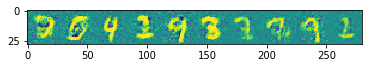

[EPOCH 1 / STEP 441]
TRAIN loss   : 796.1201
GEN   loss   : 743.7822
DIS   loss   : 52.3379
[EPOCH 2 / STEP 442]
TRAIN loss   : 779.8531
GEN   loss   : 724.9261
DIS   loss   : 54.9270
[EPOCH 3 / STEP 443]
TRAIN loss   : 789.5430
GEN   loss   : 737.4114
DIS   loss   : 52.1315
[EPOCH 4 / STEP 444]
TRAIN loss   : 782.6049
GEN   loss   : 727.9044
DIS   loss   : 54.7005
[EPOCH 5 / STEP 445]
TRAIN loss   : 803.1546
GEN   loss   : 751.6750
DIS   loss   : 51.4795
[EPOCH 6 / STEP 446]
TRAIN loss   : 782.8009
GEN   loss   : 728.0359
DIS   loss   : 54.7650
[EPOCH 7 / STEP 447]
TRAIN loss   : 801.9638
GEN   loss   : 749.5906
DIS   loss   : 52.3732
[EPOCH 8 / STEP 448]
TRAIN loss   : 786.3885
GEN   loss   : 731.8358
DIS   loss   : 54.5528
[EPOCH 9 / STEP 449]
TRAIN loss   : 794.0259
GEN   loss   : 742.0495
DIS   loss   : 51.9764
[EPOCH 10 / STEP 450]
TRAIN loss   : 780.2041
GEN   loss   : 726.3182
DIS   loss   : 53.8860


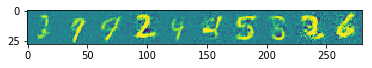

[EPOCH 1 / STEP 451]
TRAIN loss   : 790.1189
GEN   loss   : 738.6619
DIS   loss   : 51.4570
[EPOCH 2 / STEP 452]
TRAIN loss   : 781.7656
GEN   loss   : 728.2180
DIS   loss   : 53.5476
[EPOCH 3 / STEP 453]
TRAIN loss   : 785.0289
GEN   loss   : 732.8046
DIS   loss   : 52.2243
[EPOCH 4 / STEP 454]
TRAIN loss   : 790.1064
GEN   loss   : 737.0469
DIS   loss   : 53.0594
[EPOCH 5 / STEP 455]
TRAIN loss   : 783.7597
GEN   loss   : 728.8166
DIS   loss   : 54.9431
[EPOCH 6 / STEP 456]
TRAIN loss   : 779.4492
GEN   loss   : 726.3079
DIS   loss   : 53.1413
[EPOCH 7 / STEP 457]
TRAIN loss   : 775.4151
GEN   loss   : 722.4495
DIS   loss   : 52.9656
[EPOCH 8 / STEP 458]
TRAIN loss   : 782.3389
GEN   loss   : 728.8210
DIS   loss   : 53.5179
[EPOCH 9 / STEP 459]
TRAIN loss   : 791.3926
GEN   loss   : 739.0824
DIS   loss   : 52.3102
[EPOCH 10 / STEP 460]
TRAIN loss   : 779.6669
GEN   loss   : 726.4223
DIS   loss   : 53.2447


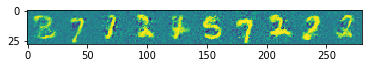

[EPOCH 1 / STEP 461]
TRAIN loss   : 783.9594
GEN   loss   : 731.4022
DIS   loss   : 52.5572
[EPOCH 2 / STEP 462]
TRAIN loss   : 785.3477
GEN   loss   : 733.4268
DIS   loss   : 51.9209
[EPOCH 3 / STEP 463]
TRAIN loss   : 779.5637
GEN   loss   : 725.8339
DIS   loss   : 53.7298
[EPOCH 4 / STEP 464]
TRAIN loss   : 793.1926
GEN   loss   : 740.1161
DIS   loss   : 53.0766
[EPOCH 5 / STEP 465]
TRAIN loss   : 786.9371
GEN   loss   : 734.0691
DIS   loss   : 52.8680
[EPOCH 6 / STEP 466]
TRAIN loss   : 786.0178
GEN   loss   : 732.3129
DIS   loss   : 53.7049
[EPOCH 7 / STEP 467]
TRAIN loss   : 778.1940
GEN   loss   : 723.8286
DIS   loss   : 54.3653
[EPOCH 8 / STEP 468]
TRAIN loss   : 775.0018
GEN   loss   : 722.8065
DIS   loss   : 52.1953
[EPOCH 9 / STEP 469]
TRAIN loss   : 781.3420
GEN   loss   : 727.1133
DIS   loss   : 54.2288
[EPOCH 10 / STEP 470]
TRAIN loss   : 783.2880
GEN   loss   : 730.5250
DIS   loss   : 52.7630


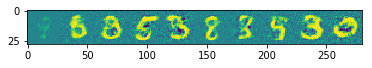

[EPOCH 1 / STEP 471]
TRAIN loss   : 783.1257
GEN   loss   : 730.5660
DIS   loss   : 52.5597
[EPOCH 2 / STEP 472]
TRAIN loss   : 783.6211
GEN   loss   : 732.1431
DIS   loss   : 51.4779
[EPOCH 3 / STEP 473]
TRAIN loss   : 784.2542
GEN   loss   : 731.5710
DIS   loss   : 52.6832
[EPOCH 4 / STEP 474]
TRAIN loss   : 782.9239
GEN   loss   : 728.5583
DIS   loss   : 54.3656
[EPOCH 5 / STEP 475]
TRAIN loss   : 781.5602
GEN   loss   : 727.3935
DIS   loss   : 54.1667
[EPOCH 6 / STEP 476]
TRAIN loss   : 772.4017
GEN   loss   : 718.8488
DIS   loss   : 53.5528
[EPOCH 7 / STEP 477]
TRAIN loss   : 783.2880
GEN   loss   : 731.5920
DIS   loss   : 51.6960
[EPOCH 8 / STEP 478]
TRAIN loss   : 784.6812
GEN   loss   : 732.0737
DIS   loss   : 52.6075
[EPOCH 9 / STEP 479]
TRAIN loss   : 773.6432
GEN   loss   : 719.7979
DIS   loss   : 53.8453
[EPOCH 10 / STEP 480]
TRAIN loss   : 761.8100
GEN   loss   : 706.5962
DIS   loss   : 55.2138


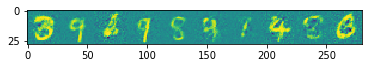

[EPOCH 1 / STEP 481]
TRAIN loss   : 773.1367
GEN   loss   : 721.6213
DIS   loss   : 51.5155
[EPOCH 2 / STEP 482]
TRAIN loss   : 773.8199
GEN   loss   : 720.3599
DIS   loss   : 53.4600
[EPOCH 3 / STEP 483]
TRAIN loss   : 764.1761
GEN   loss   : 711.9925
DIS   loss   : 52.1836
[EPOCH 4 / STEP 484]
TRAIN loss   : 761.3278
GEN   loss   : 707.3195
DIS   loss   : 54.0083
[EPOCH 5 / STEP 485]
TRAIN loss   : 779.4910
GEN   loss   : 726.2372
DIS   loss   : 53.2537
[EPOCH 6 / STEP 486]
TRAIN loss   : 778.0466
GEN   loss   : 724.4628
DIS   loss   : 53.5838
[EPOCH 7 / STEP 487]
TRAIN loss   : 764.8768
GEN   loss   : 711.9313
DIS   loss   : 52.9454
[EPOCH 8 / STEP 488]
TRAIN loss   : 773.7751
GEN   loss   : 719.8622
DIS   loss   : 53.9129
[EPOCH 9 / STEP 489]
TRAIN loss   : 774.8552
GEN   loss   : 720.8723
DIS   loss   : 53.9829
[EPOCH 10 / STEP 490]
TRAIN loss   : 777.0277
GEN   loss   : 725.3769
DIS   loss   : 51.6508


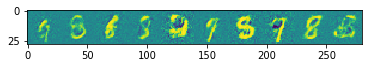

[EPOCH 1 / STEP 491]
TRAIN loss   : 754.6133
GEN   loss   : 699.4613
DIS   loss   : 55.1520
[EPOCH 2 / STEP 492]
TRAIN loss   : 770.1675
GEN   loss   : 717.3684
DIS   loss   : 52.7991
[EPOCH 3 / STEP 493]
TRAIN loss   : 761.1936
GEN   loss   : 708.0143
DIS   loss   : 53.1793
[EPOCH 4 / STEP 494]
TRAIN loss   : 758.7982
GEN   loss   : 706.1809
DIS   loss   : 52.6173
[EPOCH 5 / STEP 495]
TRAIN loss   : 766.2381
GEN   loss   : 713.6517
DIS   loss   : 52.5864
[EPOCH 6 / STEP 496]
TRAIN loss   : 762.9024
GEN   loss   : 710.7151
DIS   loss   : 52.1873
[EPOCH 7 / STEP 497]
TRAIN loss   : 770.7240
GEN   loss   : 719.2211
DIS   loss   : 51.5029
[EPOCH 8 / STEP 498]
TRAIN loss   : 770.4817
GEN   loss   : 718.3932
DIS   loss   : 52.0885
[EPOCH 9 / STEP 499]
TRAIN loss   : 779.1155
GEN   loss   : 727.1091
DIS   loss   : 52.0064
[EPOCH 10 / STEP 500]
TRAIN loss   : 768.4719
GEN   loss   : 716.0695
DIS   loss   : 52.4025


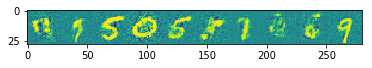

In [11]:
# if you want to train
for i in range(50):
    gan.fit(ds_train, saving=True, epochs=10, gen_step=0, dis_step=1, batch_size=256, verbose=1)
    origtest()

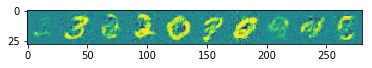

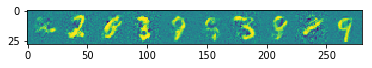

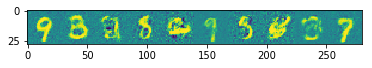

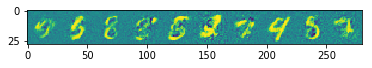

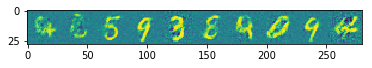

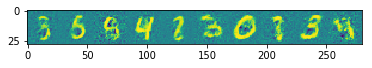

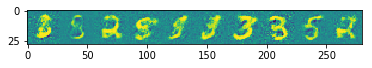

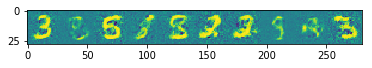

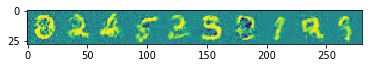

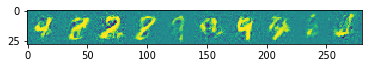

In [25]:
for i in range(10):
    origtest()